
# Assignment 03 – Data Cleaning and Preprocessing
Dataset: [Adult Census Income](https://www.kaggle.com/datasets/uciml/adult-census-income)

This notebook follows the tasks described in the assignment:
1. Load and explore the dat aset
2. Handle missing data
3. Detect and treat noisy data
4. Identify and fix inconsistent data
5. Remove duplicates
6. Handle irrelevant or redundant data
7. Save cleaned dataset

In [22]:
# ------------------------------
# Task 1: Load and Explore
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'adult.csv'  # change this if your file name is different

df = pd.read_csv(file_path)

    
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()


Shape: (32561, 15)

Columns:
 ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [27]:
# Explore data types and basic info
df.info()

# Quick statistics for numeric columns
df.describe()
# df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
# Count '?' in each column
placeholder = '?'
missing_counts = (df == placeholder).sum()
print("Counts of '?' placeholder values per column:")
print(missing_counts[missing_counts > 0])

# Replace '?' with actual NaN
df_repl = df.replace(placeholder, np.nan)

# Now check missing values normally
print("\nMissing values after replacement:")
print(df_repl.isna().sum())

# Impute categorical columns with mode
for col in df_repl.columns:
    if df_repl[col].dtype == 'object':
        mode_val = df_repl[col].mode()[0]
        df_repl[col] = df_repl[col].fillna(mode_val)
    else:
        # for numeric columns, we can use median
        df_repl[col] = df_repl[col].fillna(df_repl[col].median())

print("\nMissing values AFTER imputation:")
print(df_repl.isna().sum())

df_repl.head()


Counts of '?' placeholder values per column:
workclass         1836
occupation        1843
native.country     583
dtype: int64

Missing values after replacement:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Missing values AFTER imputation:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Task 3: Detect and Treat Noisy Data (Outliers)
We'll look at numeric columns (like `age`, `hours-per-week`, `fnlwgt`, `education-num`) and detect outliers using the IQR method. Then we'll cap them (winsorize) to reduce their effect.

Numeric columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


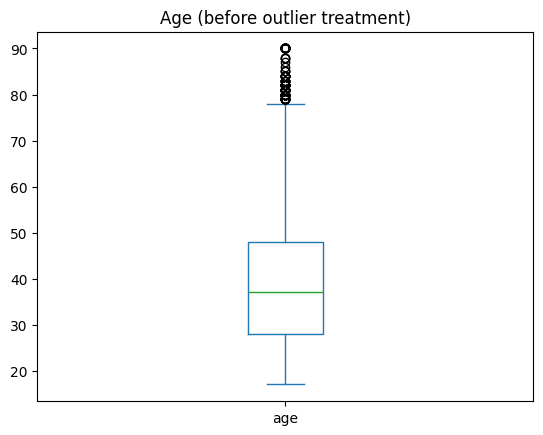

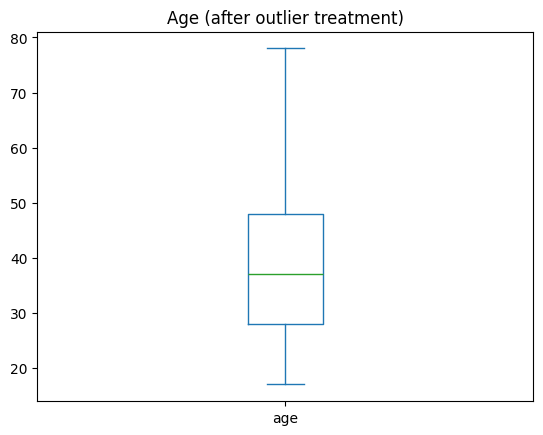

In [58]:
# Select numeric columns
num_cols = df_repl.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", num_cols)

def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower,
                    np.where(series > upper, upper, series))

# Create a copy to store cleaned numeric data
df_clean = df_repl.copy()
for col in num_cols:
    df_clean[col] = cap_outliers_iqr(df_clean[col])

# Visual check: boxplot before/after for Age
plt.figure()
df_repl['age'].plot(kind='box', title='Age (before outlier treatment)')
plt.show()

plt.figure()
df_clean['age'].plot(kind='box', title='Age (after outlier treatment)')
plt.show()

## Task 4: Identify and Fix Inconsistent Data
In this dataset, we don't usually have date formats, but we **do** have categorical values with leading/trailing spaces and mixed casing.
We'll:
- Strip spaces
- Standardize to title case for readability
- Ensure consistent labels


In [60]:
# rename columns with a . to an underscore

df_clean.columns = df_clean.columns.str.replace('.', '_', regex=False)

# Strip spaces and standardize categorical columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

df_clean['sex'] = (
    df['sex'].astype(str).str.strip().str.lower().replace({
        'm': 'Male',
        'male': 'Male',
        'f': 'Female',
        'female': 'Female'
    })
    .str.title()
)

for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()
    # for columns like 'sex' we can standardize further
    if col.lower() == 'sex':
        df_clean[col] = df_clean[col].str.capitalize()
    else:
        # title case is safe for most
        df_clean[col] = df_clean[col].str.replace('_', ' ')
        
# Check unique values from a few columns
for col in list(cat_cols)[:5]:
    print(f"\nUnique values in {col}:")
    print(df_clean[col].unique()[:20])


Unique values in workclass:
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Unique values in education:
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Unique values in marital_status:
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in occupation:
['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']

Unique values in relationship:
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,0.0,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,Private,310152.0,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
32557,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32558,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32559,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


## Task 5: Remove Duplicates

In [61]:
before_dupes = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
after_dupes = df_clean.shape[0]

print(f"Rows before removing duplicates: {before_dupes}")
print(f"Rows after removing duplicates:  {after_dupes}")
print(f"Duplicate rows removed:          {before_dupes - after_dupes}")


Rows before removing duplicates: 32561
Rows after removing duplicates:  32508
Duplicate rows removed:          53


## Task 6: Handle Irrelevant or Redundant Data
The Adult dataset doesn't have an obvious ID column, but sometimes `fnlwgt` is dropped in modeling because it is a sampling weight.
We'll show how to drop it, but keep a version with it as well.

In [62]:
# Optionally drop 'fnlwgt' if not needed for analysis/modeling
df_final = df_clean.drop(columns=['fnlwgt'], errors='ignore')

print("Final shape after dropping irrelevant columns (if any):", df_final.shape)
df_final.head()


Final shape after dropping irrelevant columns (if any): (32508, 14)


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,78.0,Private,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1,78.0,Private,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,0.0,32.5,United-States,<=50K
2,66.0,Private,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
3,54.0,Private,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
4,41.0,Private,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K


## Save Cleaned Dataset

In [63]:
output_path = 'adult_cleaned.csv'
df_final.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to adult_cleaned.csv
